# DS 3000 - Pract 2

**Student Name**: Alejandro Janav Andrew

**Date**: 6/23/24



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import pickle 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

## Question 1: 
Question 1 — The DS Problem (0 point)

In your own words, formulate the Data Science problem.



How can we create the best model, using the data and variables provided, to predict of someone has diabetes. (could use some work)

## Question 2 — Prepare the Data (5 pts)

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#load and describe
diabetes_df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

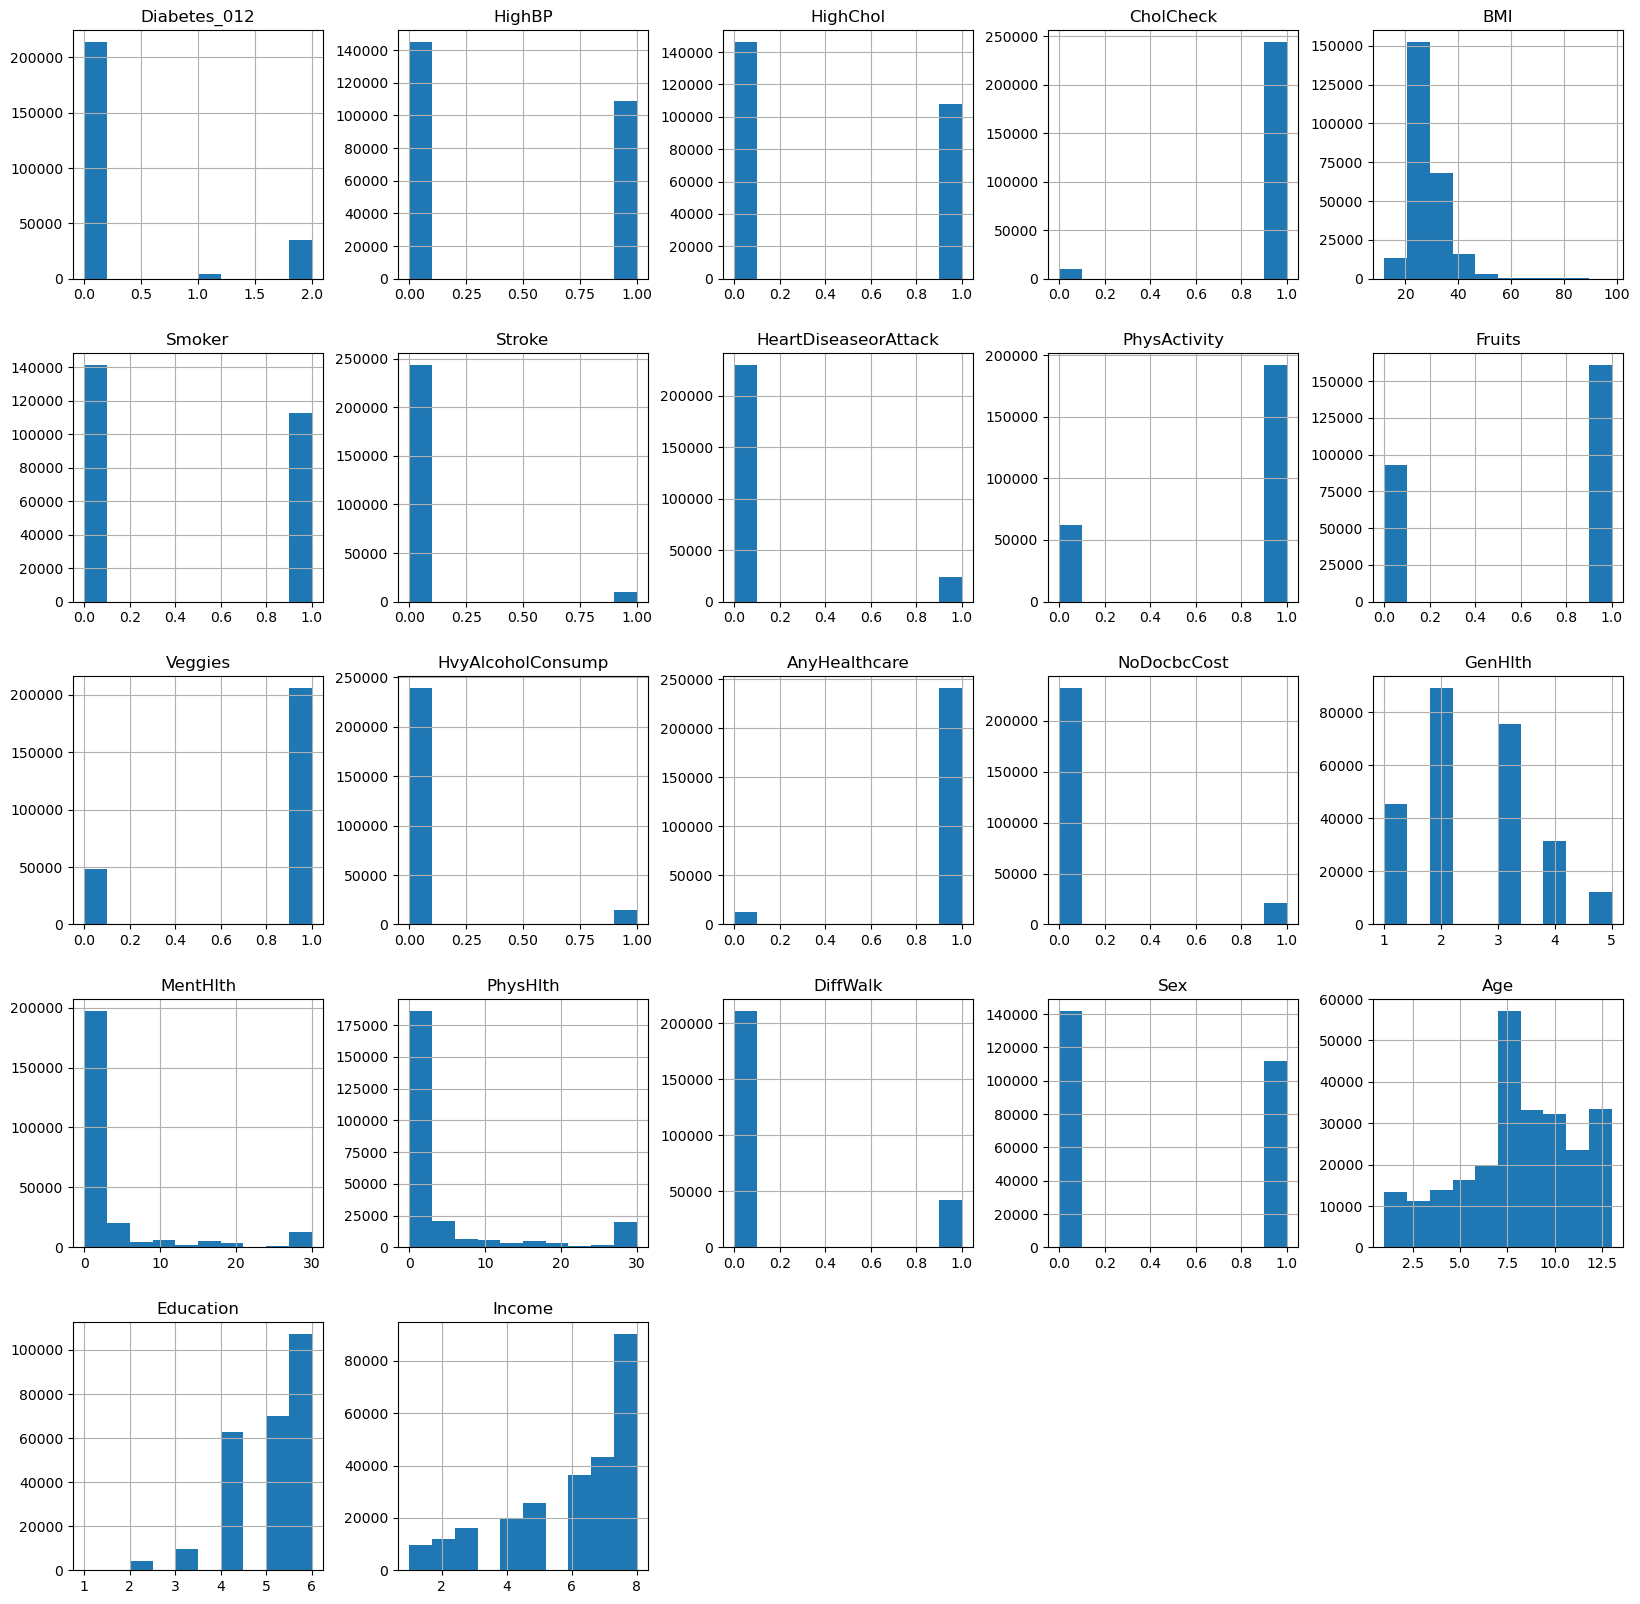

In [3]:
#To check that all the plots look normal
diabetes_df.hist(figsize = (20,20))


In [4]:
import pandas as pd

# Old data types
print("Old Data Types:")
print(diabetes_df.dtypes)

# columns to change to categorical
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                       'NoDocbcCost', 'Sex', 'DiffWalk','Age']

# Convert to categorical
for col in categorical_columns:
    diabetes_df[col] = diabetes_df[col].astype('category')

# view new types
print("New Data Types:")
print(diabetes_df.dtypes)


Old Data Types:
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
New Data Types:
Diabetes_012             float64
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttac

In [5]:
# Check for missing values
print("Missing Values:")
print(diabetes_df.isnull().sum())


Missing Values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


## Question 3 — (35 points)

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

In [6]:
#correlation matrix testing
cm = diabetes_df.corr().round(2)
#Only print the outcome correlations
print("Correlation with 'Diabetes_012':")
print(cm['Diabetes_012'].sort_values(key=abs,ascending=False))
print()
print("Correlation with 'GenHlth':")
print(cm['GenHlth'].sort_values(key=abs,ascending=False))

Correlation with 'Diabetes_012':
Diabetes_012            1.00
GenHlth                 0.30
HighBP                  0.27
BMI                     0.22
DiffWalk                0.22
HighChol                0.21
Age                     0.19
PhysHlth                0.18
HeartDiseaseorAttack    0.18
Income                 -0.17
Education              -0.13
PhysActivity           -0.12
Stroke                  0.11
MentHlth                0.07
CholCheck               0.07
Veggies                -0.06
Smoker                  0.06
HvyAlcoholConsump      -0.06
Fruits                 -0.04
NoDocbcCost             0.04
Sex                     0.03
AnyHealthcare           0.02
Name: Diabetes_012, dtype: float64

Correlation with 'GenHlth':
GenHlth                 1.00
PhysHlth                0.52
DiffWalk                0.46
Income                 -0.37
HighBP                  0.30
MentHlth                0.30
Diabetes_012            0.30
Education              -0.28
PhysActivity           -0.27
Hear

## EDA and Significance Testsing(Question 4a)

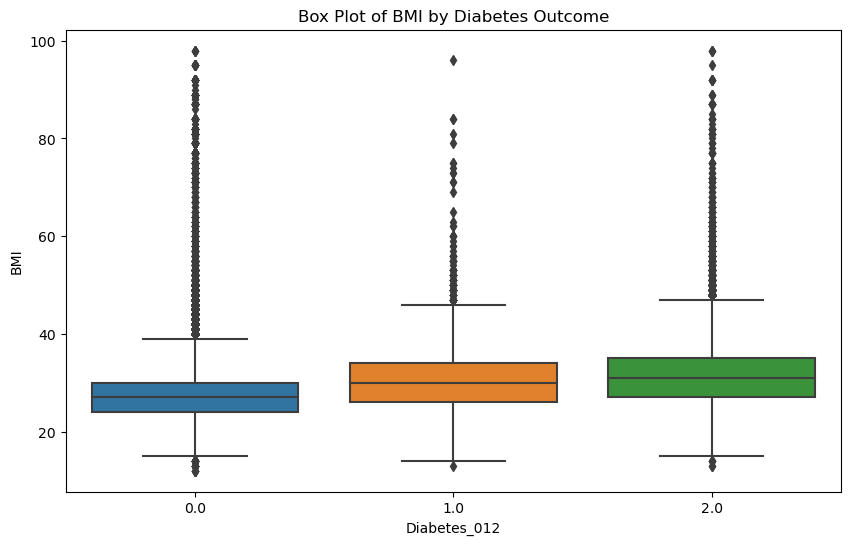

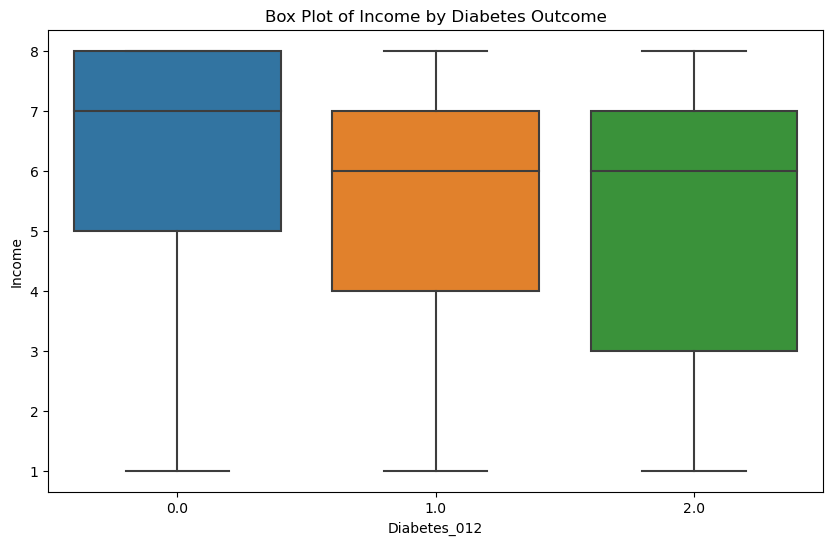

BMI:
 t-test p-value=5.820712052672346e-224

Income:
 t-test p-value=3.7311693523328963e-181

Medians:
               BMI  Income
Diabetes_012              
0.0           27.0     7.0
1.0           30.0     6.0
2.0           31.0     6.0
 
mean:
                    BMI    Income
Diabetes_012                     
0.0           27.742521  6.208663
1.0           30.724466  5.351112
2.0           31.944011  5.210094


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

continuous_variables = ['BMI', 'Income']

#Box plots by Diabetes_012
for var in continuous_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Diabetes_012', y=var, data=diabetes_df)
    plt.title(f'Box Plot of {var} by Diabetes Outcome')
    plt.show()

#significance test
results = {}
for var in continuous_variables:
    group1 = diabetes_df[diabetes_df['Diabetes_012'] == 0][var]
    group2 = diabetes_df[diabetes_df['Diabetes_012'] == 1][var]
    t_stat, p_val_t = ttest_ind(group1, group2, nan_policy='omit')
    results[var] = {'t-test p-value': p_val_t}

# Print results
for var, res in results.items():
    print(f"{var}:")
    print(f" t-test p-value={res['t-test p-value']:}")
    print()

#print medians
medians = diabetes_df.groupby('Diabetes_012')[continuous_variables].median()
print("Medians:")
print(medians)

print( " ")

#print means
mean = diabetes_df.groupby('Diabetes_012')[continuous_variables].mean()
print("mean:")
print(mean)


H0(Income): There is no relation between Income and Diabetes_012, they are independent
H0(BMI): There is no relation between BMI and Diabetes_012, they are independent

With a signifiance value of .05 and a p-value for both BMI and Income, we can see that we can reject the null hypotheses for both.

This is 4b we have not done box plots yet.

Phi coefficient between HighBP and HeartDiseaseorAttack: 0.21


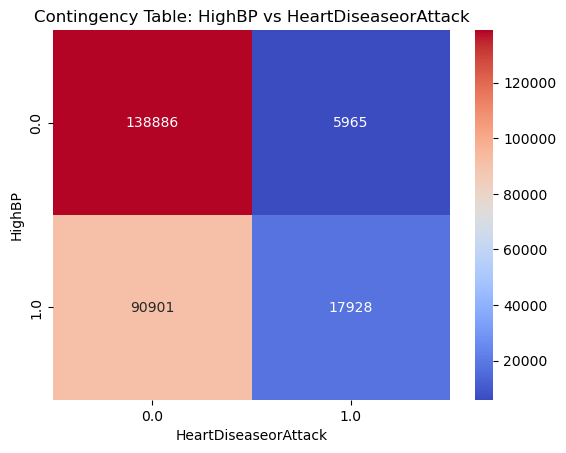

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
#coef between two binary variables
var1 = 'HighBP'
var2 = 'HeartDiseaseorAttack'

#Contingency table
contingency_table = pd.crosstab(diabetes_df[var1], diabetes_df[var2])

#Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

#Phi coefficient
phi_coefficient = np.sqrt(chi2 / diabetes_df.shape[0])

print(f'Phi coefficient between {var1} and {var2}: {phi_coefficient:.2f}')

#Plot and print
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Contingency Table: {var1} vs {var2}')
plt.xlabel(var2)
plt.ylabel(var1)
plt.show()


Null Hypothesis (H0): There is no relationship between HighBP and HeartDisesaseorAttack

Alternative Hypothesis: There is a relationship between HighBP and HeartDisesaseorAttack

contingency table shows us that low number 5965(low bp , heart attack) is less likelly than 17928 (highbp , heart attack)

In [9]:
# interpret p-value
alpha = 0.05
print("p value is " + str('{:0.2e}'.format(p)))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.00e+00
Dependent (reject H0)


## Question 4 (feature selection)

                 feature  importance
2                    BMI        0.18
5                    Age        0.12
8                 Income        0.10
6               PhysHlth        0.08
0                GenHlth        0.07
9              Education        0.07
12              MentHlth        0.06
1                 HighBP        0.04
17                Fruits        0.03
15                Smoker        0.03
19                   Sex        0.03
14               Veggies        0.03
10          PhysActivity        0.03
4               HighChol        0.03
3               DiffWalk        0.02
7   HeartDiseaseorAttack        0.02
18           NoDocbcCost        0.02
11                Stroke        0.01
20         AnyHealthcare        0.01
16     HvyAlcoholConsump        0.01
13             CholCheck        0.00


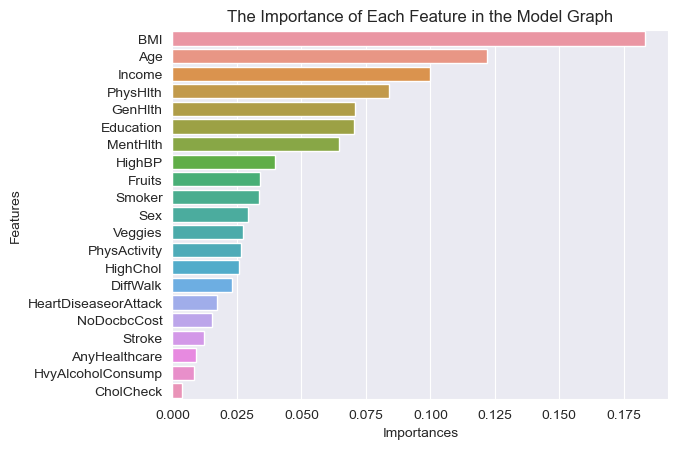

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

#all variables
X = diabetes_df[['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'PhysHlth', 'HeartDiseaseorAttack', 'Income', 'Education', 'PhysActivity', 'Stroke', 'MentHlth', 'CholCheck', 'Veggies', 'Smoker', 'HvyAlcoholConsump', 'Fruits', 'NoDocbcCost', 'Sex', 'AnyHealthcare']]
y = diabetes_df['Diabetes_012']

#train/test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=7)
#-------------------------------------------------
#fitting
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=7)

#classifier initilization
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train_shuffled, y_train_shuffled)

#fit the classifier
rf.fit(X_train, y_train)
#---------------------------------------------------
#grab feature importances
important_features = rf.feature_importances_
names = X.columns

#create a df 
important_features_df = pd.DataFrame({
    'feature': names,
    'importance': important_features
}).sort_values(by='importance', ascending=False)

#print results
print(important_features_df.round(2))

#plot results
sns.barplot(x='importance', y='feature', data=important_features_df)
plt.title('The Importance of Each Feature in the Model Graph')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.show()




In [11]:
from sklearn.feature_selection import mutual_info_regression
ig = mutual_info_regression(X, y)

#dictionary creation
feature_scores = {}
for i in range(len(X.columns.values)):
    feature_scores[X.columns.values[i]] = ig[i]
    
#sort
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#print
for feature, score in sorted_features:
    print('Feature:', feature, 'Score:', score)

Feature: GenHlth Score: 0.04911459403784679
Feature: HighBP Score: 0.03720406582333524
Feature: BMI Score: 0.02844249100546392
Feature: DiffWalk Score: 0.023688358021833444
Feature: Age Score: 0.023359748837748384
Feature: HighChol Score: 0.022633884027476014
Feature: Income Score: 0.015596544595405604
Feature: PhysHlth Score: 0.01386503515069748
Feature: HeartDiseaseorAttack Score: 0.012729823272407792
Feature: Education Score: 0.009000961758106385
Feature: PhysActivity Score: 0.007066939125463634
Feature: Stroke Score: 0.004984861228327198
Feature: CholCheck Score: 0.004918854288566976
Feature: Veggies Score: 0.0037442608615370077
Feature: Smoker Score: 0.002922569020634924
Feature: MentHlth Score: 0.0024725491445583003
Feature: Fruits Score: 0.002245513574246516
Feature: Sex Score: 0.0008334705527355268
Feature: AnyHealthcare Score: 0.0005660511597600504
Feature: HvyAlcoholConsump Score: 0.0
Feature: NoDocbcCost Score: 0.0


In [12]:
info_df = pd.DataFrame(sorted_features)
#display(info_df)

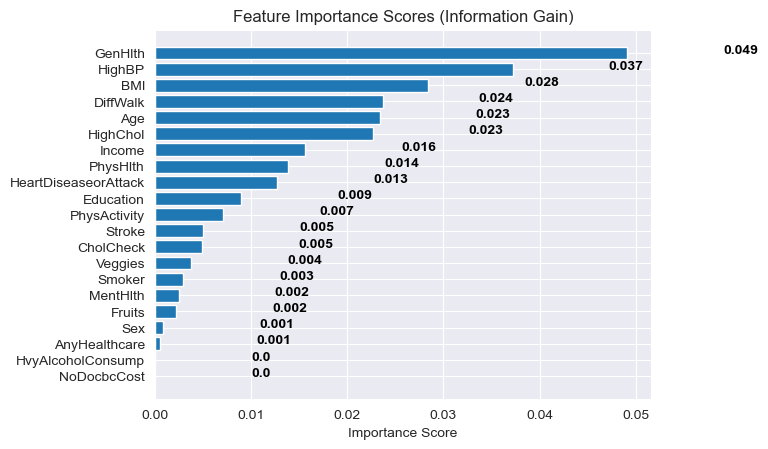

In [13]:
import numpy as np
#plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

#importance scores as labels
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

While feature importance is an effective way to do feature selection. We should note that the feature importance numbers we calculated is for that specific model and that specific data is it was trained on. Information gain helps us understand the dependence of each variable in relation to the target variable. However, information gain doesn't consider any classification algorithm while the feature importance does. This means that a classification algortithm would be able to tell if any combination of features are important rather than just singular features that information gain tells us. 

For the sake of minimizing both of these problems, I will standardize their scores and take the average to give us a final graph to determine which features we should use.

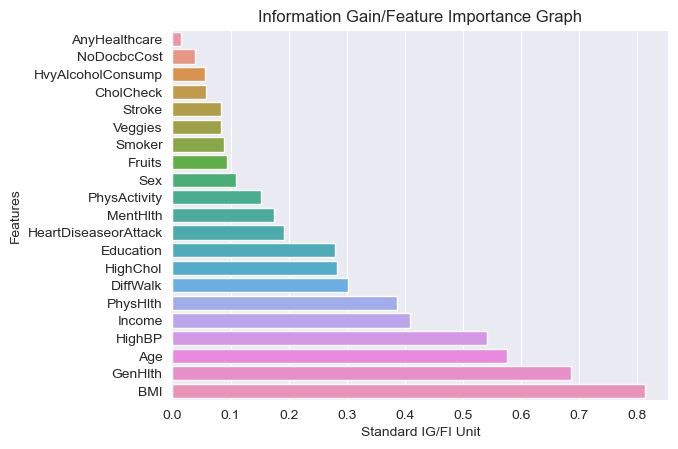

In [14]:
#information gain
ig = mutual_info_regression(X, y)

#dictionary for feature importance scores
feature_scores = {}
for i in range(len(X.columns.values)):
    feature_scores[X.columns.values[i]] = ig[i]

#sorting the features 
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

info_df = pd.DataFrame(sorted_features, columns=['feature', 'importance_ig'])

#merge
concat_df = important_features_df.merge(info_df, on='feature', how='outer')

#min-max normalization of both columns
normalized_df = (concat_df[['importance', 'importance_ig']] - concat_df[['importance', 'importance_ig']].min()) / (concat_df[['importance', 'importance_ig']].max() - concat_df[['importance', 'importance_ig']].min())
normalized_df['final'] = normalized_df.mean(axis=1)
normalized_df['feature'] = concat_df['feature']

#plot
normalized_df.sort_values('final', ascending=True, inplace=True)
sns.barplot(x='final', y='feature', data=normalized_df)
plt.title('Information Gain/Feature Importance Graph')
plt.xlabel('Standard IG/FI Unit')
plt.ylabel('Features')
plt.show()

Lets use the top 9 (drop off after 9) of the features to reduce the dimensionality of the model. That would be BMI, GenHlth, Age, HighBP, Income, PhysHlth, highchol, diffwalk, education

In [15]:
from scipy.stats import chi2_contingency
import scipy.stats as stats 

data = pd.crosstab(diabetes_df['Sex'], diabetes_df['Diabetes_012']) 
#data

Null Hypothesis: There is no relationship between Diabetes_012 and Sex

Alternative Hypothesis: There is a relationship between Diabetes_012 and Sex

In [16]:
stat, p, dof, expected = chi2_contingency(data)
#interpret p-value
alpha = 0.05
print("p value is " + str('{:0.2e}'.format(p)))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 3.38e-55
Dependent (reject H0)


In [17]:
data = pd.crosstab(diabetes_df['Diabetes_012'], diabetes_df['AnyHealthcare']) 
#data

Null Hypothesis: There is no relationship between Diabetes_012 and AnyHealthcare

Alternative Hypothesis: There is a relationship between Diabetes_012 and AnyHealthcare

In [18]:
stat, p, dof, expected = chi2_contingency(data)
#interpret p-value
alpha = 0.05
print("p value is " + str('{:0.2e}'.format(p)))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 1.00e-15
Dependent (reject H0)


## Question 5

- Partition the data into train/test sets. After which, perform the following:
    - encode any categorical data. Ensure that categorical variables are represented correctly.
    - normalize numeric data.
    - Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [19]:
#this has been done because our svc model was not running for upwards of an hour,
#the ta's gave us no other solution, so we came up with this
print(diabetes_df.shape)
# Sample 0.2 of the data at random, 50k is still a ton of data
diabetes_df = diabetes_df.sample(frac=0.2, random_state=42)
print(diabetes_df.shape)

(253680, 22)
(50736, 22)


In [20]:

# Encoding the categorical feature
diabetes_df = pd.get_dummies(diabetes_df, drop_first=True)

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50736 entries, 219620 to 202118
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diabetes_012              50736 non-null  float64
 1   BMI                       50736 non-null  float64
 2   GenHlth                   50736 non-null  float64
 3   MentHlth                  50736 non-null  float64
 4   PhysHlth                  50736 non-null  float64
 5   Education                 50736 non-null  float64
 6   Income                    50736 non-null  float64
 7   HighBP_1.0                50736 non-null  bool   
 8   HighChol_1.0              50736 non-null  bool   
 9   CholCheck_1.0             50736 non-null  bool   
 10  Smoker_1.0                50736 non-null  bool   
 11  Stroke_1.0                50736 non-null  bool   
 12  HeartDiseaseorAttack_1.0  50736 non-null  bool   
 13  PhysActivity_1.0          50736 non-null  bool   
 14  Fruit

In [21]:
#setting the features from above
#top fet: BMI, GenHlth, Age, HighBP, Income, PhysHlth, highchol, diffwalk, education
X = diabetes_df[['BMI', 'GenHlth', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 
                 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 
                 'Age_11.0', 'Age_12.0', 'Age_13.0', 'HighBP_1.0', 'Income',
                 'PhysHlth', 'HighChol_1.0', 'DiffWalk_1.0', 'Education']]
y = diabetes_df['Diabetes_012']

In [22]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10,
                                                    stratify=y
                                                   )


In [23]:
#Normalizing the numericals

scaler = StandardScaler()
scaler.fit(X_train[['BMI', 'GenHlth', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 
                 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 
                 'Age_11.0', 'Age_12.0', 'Age_13.0', 'HighBP_1.0', 'Income',
                 'PhysHlth', 'HighChol_1.0', 'DiffWalk_1.0', 'Education']])
X_train[['BMI', 'GenHlth', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 
                 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 
                 'Age_11.0', 'Age_12.0', 'Age_13.0', 'HighBP_1.0', 'Income',
                 'PhysHlth', 'HighChol_1.0', 'DiffWalk_1.0', 'Education']] = scaler.transform(X_train[['BMI', 'GenHlth', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 
                 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 
                 'Age_11.0', 'Age_12.0', 'Age_13.0', 'HighBP_1.0', 'Income',
                 'PhysHlth', 'HighChol_1.0', 'DiffWalk_1.0', 'Education']])

## Question 6

- Build the ML model that predicts the target variable based on the selected features. Ensure that you:
    - Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
    - Use GridSearchCV to tune at least two hyperparameters for each algorithm.
    - Note: do not change the input features in your experiments.

The following models were used to handle non linear data and multiple input features/variables:

- KNN Model
- SVC Model
- Decision Tree Model

## KNN Model

In [24]:
#train
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#evaluate
y_pred = knn_model.predict(X_test)
print("Test Set Accuracy:", round(accuracy_score(y_test, y_pred), 2))

Test Set Accuracy: 0.8


In [25]:
# Tuning the model

parameters_KNN = {
    'n_neighbors': range(1, 2),
    'leaf_size': range(1, 2),
}

#setting GridSearchCV up
grid_search_KNN = GridSearchCV(
    estimator=knn_model,
    param_grid=parameters_KNN,
    scoring='accuracy',
    n_jobs=-1,
    cv=3
)

#fitting the grid search to the validation data
grid_search_KNN.fit(X_train, y_train)

print("Best Parameters:", grid_search_KNN.best_params_)

Best Parameters: {'leaf_size': 1, 'n_neighbors': 1}


In [26]:
# Evaluating the model

# Getting the best model from the grid search
best_model_KNN = grid_search_KNN.best_estimator_
y_pred = best_model_KNN.predict(X_test)
acc = round(accuracy_score(y_test, y_pred), 2)
print("Test Set Accuracy:", acc)
acc = round(accuracy_score(y_test, y_pred), 3)
print("Test Set Accuracy:", acc)

# Save the best model and grid search results
with open('best_model.pkl', 'wb') as f:
    pickle.dump (best_model_KNN, f)
with open('grid_search_results.pkl', 'wb') as f:
    pickle.dump(grid_search_KNN, f)

Test Set Accuracy: 0.84
Test Set Accuracy: 0.837


## SVC

In [27]:
# Training the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluating the model
y_pred = svm_model.predict(X_test)
print("Test Set Accuracy:", round(accuracy_score(y_test, y_pred), 2))

Test Set Accuracy: 0.84


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [1, 3],
    'kernel': ['rbf', 'poly']
}

# Initializing GridSearchCV
grid_search_SVM = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,  
    scoring='accuracy'
)

# Fitting the model using GridSearchCV on the training subset
grid_search_SVM.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search_SVM.best_params_)


Best Parameters: {'C': 3, 'kernel': 'rbf'}


In [29]:
# Evaluating the model

# Retrieving the best model
best_model_SVM = grid_search_SVM.best_estimator_

# Predicting on the test set with the best SVM model
y_pred_svm = best_model_SVM.predict(X_test)

# Calculating accuracy on the test set
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Printing the results
print("Best Parameters:", grid_search_SVM.best_params_)
print("Best Cross-Validation Score:", round(grid_search_SVM.best_score_, 2))
print("Test Set Accuracy:", round(svm_accuracy, 2))
print("Test Set Accuracy:", round(svm_accuracy, 3))

# Save the best model and grid search results
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_SVM, f)
with open('grid_search_results.pkl', 'wb') as f:
    pickle.dump(grid_search_SVM, f)

Best Parameters: {'C': 3, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.85
Test Set Accuracy: 0.84
Test Set Accuracy: 0.844


## Decision Tree

In [30]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

# Evaluating the model
y_pred = dt_model.predict(X_test)
print("Test Set Accuracy:", round(accuracy_score(y_test, y_pred), 2))

Test Set Accuracy: 0.55


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Defining a refined hyperparameter grid for Decision Tree
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 25, 5).tolist() + [None],   
    'min_samples_split': np.arange(2, 12, 2).tolist(),  
    'min_samples_leaf': np.arange(1, 6, 1).tolist()     
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=10)

# Initializing RandomizedSearchCV with the decision tree model
random_search_DT = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=50,           
    cv=5,                
    n_jobs=-1,
    scoring='accuracy',
    random_state=10
)

# Fitting the model using RandomizedSearchCV
random_search_DT.fit(X_train, y_train)

# Retrieving the best model
best_model_DT = random_search_DT.best_estimator_

print("Best Parameters:", random_search_DT.best_params_)


Best Parameters: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}


In [32]:
# Evaluating the model

# Fitting the best model on the training data
best_model_DT.fit(X_train, y_train)

# Predicting on the test set using the best model
y_pred = best_model_DT.predict(X_test)

# Evaluate and display results
print("Test Set Accuracy:", round(accuracy_score(y_test, y_pred), 2))

# Save the best model and grid search results
with open('best_model.pkl', 'wb') as f:
    pickle.dump (best_model_DT, f)
with open('grid_search_results.pkl', 'wb') as f:
    pickle.dump(random_search_DT, f)

Test Set Accuracy: 0.75


## Question 7

- Analyze the evaluated models. For each algorithm, ensure that you:
    - Display: 1) the best model and 2) the best score that was obtained.
    - Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

Based on our analysis using accuracy scores, the SVC model emerged as the best-performing algorithm for the healthcare dataset, achieving an accuracy of 84.4%. While the KNN model and Decision Tree were also very close, the runtime for SVC was very high but since it produced the highest percent we will say it was the best model. 

Additionally, the size of the dataset also made it challenging for us to get a model with a higher accuracy score. We were unable to set higher and better parameters and use majority of the data to get an accurate prediction of diabetes. This was due to our systems being unable to handle the load. Moreover, we also implemented pickle files to help us make the run time faster. 

However, this model cannot be used in the medical feild as its accuracy is just below 85% and is not a reliable model. With more computing and evaluation power, we could've optimized it further. 

 ## Question 8 — (10 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.
 

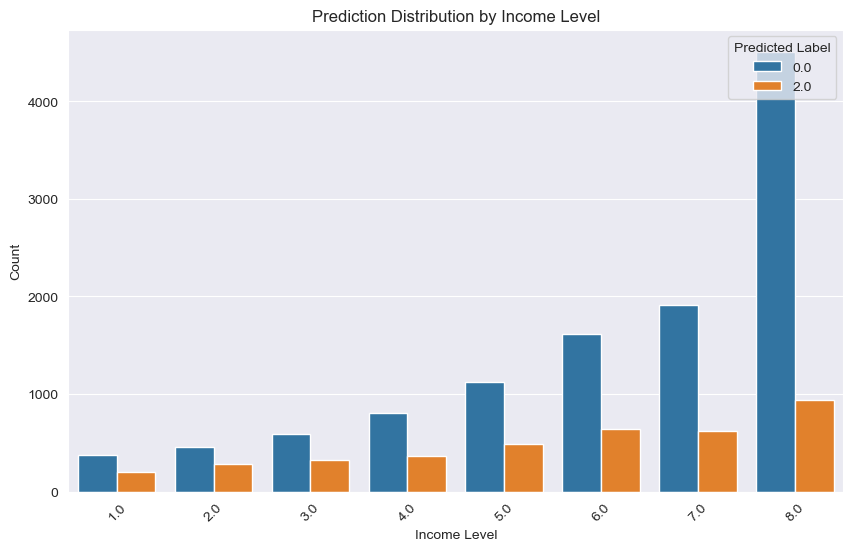

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#create df
results_df = X_test.copy() 
results_df['True_Label'] = y_test
results_df['Predicted_Label'] = y_pred

#set income feature
income_feature = 'Income' 

#plotting
sns.countplot(x=income_feature, data=results_df, hue='Predicted_Label')
plt.title('Prediction Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

#legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Predicted Label', loc='upper right')

plt.show()


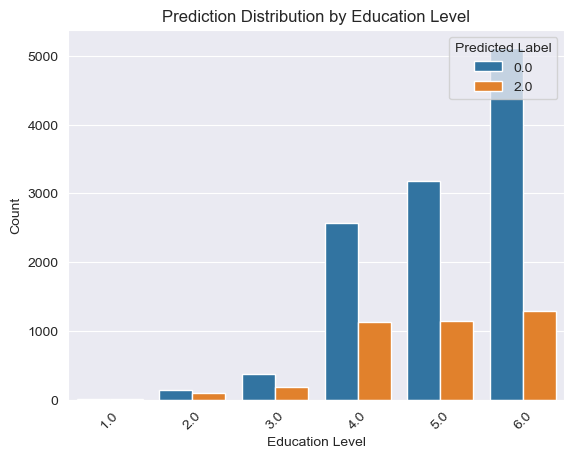

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


results_df = X_test.copy() 
results_df['True_Label'] = y_test
results_df['Predicted_Label'] = y_pred

# setting the feature
income_feature = 'Education' 

#plotting
sns.countplot(x=income_feature, data=results_df, hue='Predicted_Label')
plt.title('Prediction Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

#legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Predicted Label', loc='upper right')

plt.show()
